## **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **FitzHugh-Nagumo Neuron Model**
##$\frac{dv}{dt} = f(v) - w + I_m$

where,

$f(v) = v(a-v)(v-1)$

and,

### $\frac{dw}{dt} = bv - rw$

## **Initializing the required parameters**

In [2]:
a = 0.5
b = 0.1
r = 0.1

## **Setting up the functions: $f$, $\frac{dv}{dt}$, $\frac{dw}{dt}$**

In [3]:
def f(v, a = 0.5):
    return v*(a-v)*(v-1)

def vhat(v, w, I):
    return f(v) - w + I

def what(v, w, b = 0.1, r = 0.1):
    return b*v - r*w

##**Single forward Euler integration**


In [4]:
'''
def v_integrate(v, w, dt, I, time):
    vhist = []
    iters = int(time/dt)
    for i in range(iters):
        v = v + vhat(v, w, I)*dt
        vhist.append(v)
    retrun vhist

def w_integrate(v, w, dt, time):
    whist = []
    iters = int(time/dt)
    for i in range(iters):
        w = w + vhat(v, w)*dt
        whist.append(v)
    retrun whist
'''

def integration(v, w, dt, I, time, b = 0.1, r = 0.1):
    vhist = []
    whist = []
    iters = int(time/dt)
    for i in range(iters):
        v, w = (v + vhat(v, w, I)*dt), (w + what(v, w, b, r)*dt)
        vhist.append(v)
        whist.append(w)

    return vhist, whist

##**Finding and plotting nullclines**


In [5]:
def nullclines(v, I, b = 0.1, r = 0.1):
    v_null = f(v) + I
    w_null = (b/r)*v
    return v_null, w_null

def plot_nullclines(I, xlim, ylim, pos, b = 0.1, r = 0.1):
    
    color = ['limegreen', 'goldenrod', 'indianred', 'darkcyan', 'lightsteelblue']*3
    
    v = np.linspace(xlim[0], xlim[1], 100)
    w = np.linspace(xlim[0], xlim[1], 100)
    
    v_mesh, w_mesh = np.meshgrid(v, w)
    v_vel = vhat(v_mesh, w_mesh, I)
    w_vel = what(v_mesh, w_mesh)
    
    v_null, w_null = nullclines(v, I, b, r)
    
    plt.figure()
    plt.plot(v, v_null, 'b')
    plt.plot(v, w_null, 'r')
    plt.legend(['v nullcline', 'w nullcline'])
    plt.ylim(ylim[0], ylim[1])
    title = "Phase Plot for I=" + str(round(I, 3))
    plt.title(title)
    plt.xlabel('v values')
    plt.ylabel('w vaues')
    
    
    if pos:
        for i in range(len(pos)):
            plt.streamplot(v_mesh, w_mesh, v_vel, w_vel, density=2, start_points=[pos[i]], color=color[i], integration_direction="forward", arrowsize=2)
    else:
        plt.streamplot(v_mesh, w_mesh, v_vel, w_vel, color=color[0])
        
    plt.grid()
    plt.show()

##**Plotting the $v(t)$ and $w(t)$ functions**

In [6]:
def plot_fig(y, title, ylim, x, xlim):
    plt.figure()
    plt.title(title)
    color = ["b", "r"]
    
    if not x:
        for i in y:
            plt.plot(i)        
    else:
        for i,j in enumerate(y):
            plt.plot(x, j, color=color[i])
            
    if ylim: plt.ylim(ylim)
    if xlim: plt.xlim(xlim)
    
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.legend(["v(t)", "w(t)"])
    plt.grid()
    plt.show()

##**Plotting the nullclines and voltage for each of the given cases**

###**Case-1: $I_{ext} = 0$**

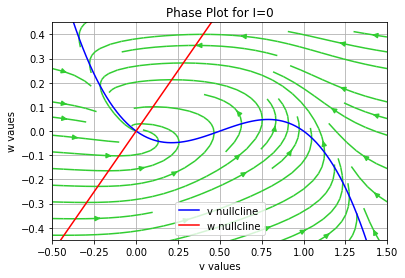

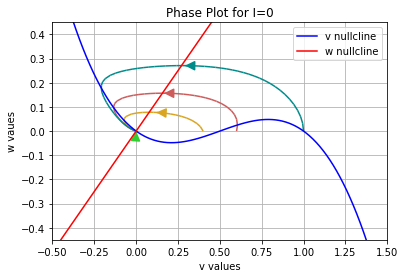

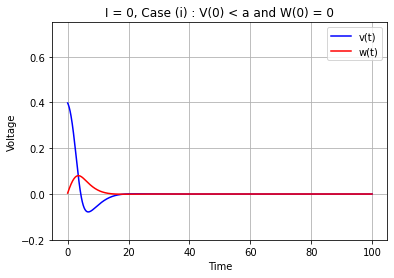

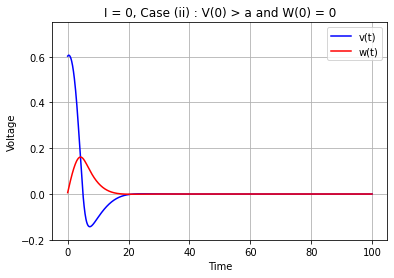

In [7]:
I = 0
time = 100
dt = 0.1

#Phase Plot
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [])
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [[0,0], [0.4,0], [0.6, 0], [1, 0]])

x = list(np.linspace(0,100,1000))

#1(i): V(0) < a and W(0) = 0
vhist, whist = integration(0.4, 0, dt, I, time)
plot_fig([vhist, whist], "I = 0, Case (i) : V(0) < a and W(0) = 0", (-0.2,0.75), x, xlim=())

#1(ii): V(0) > a and W(0) = 0
vhist, whist = integration(0.6, 0, dt, I, time)
plot_fig([vhist, whist], "I = 0, Case (ii) : V(0) > a and W(0) = 0", (-0.2,0.75), x, xlim=())

###**Finding $I_1$ and $I_2$ for the subsequent questions**


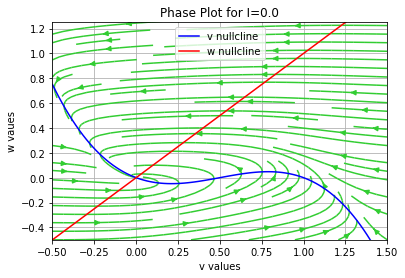

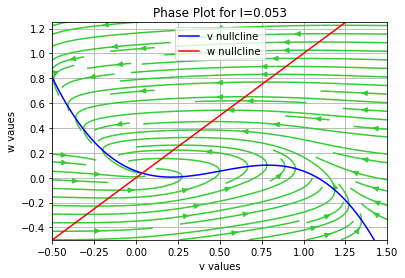

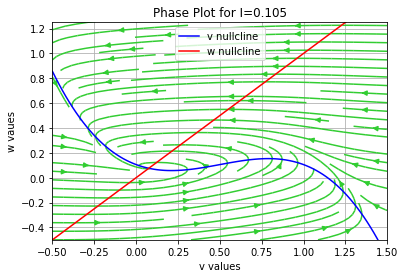

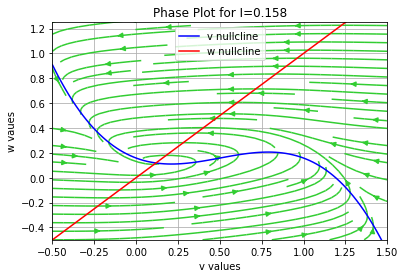

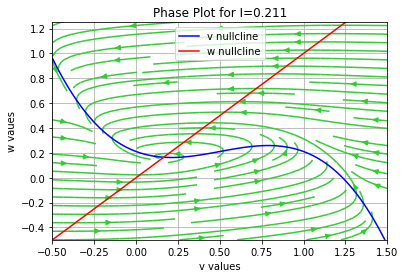

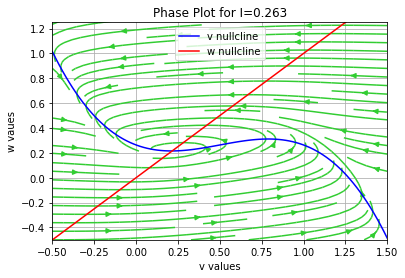

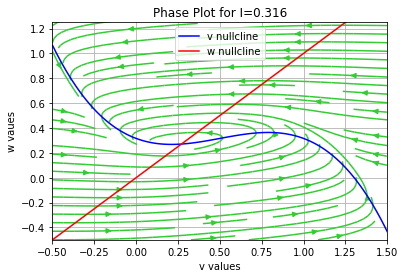

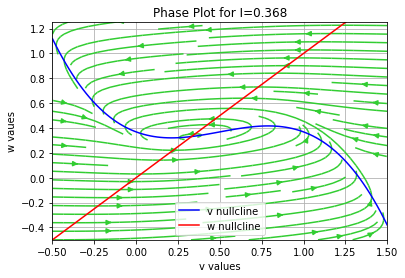

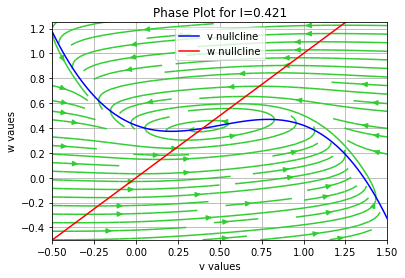

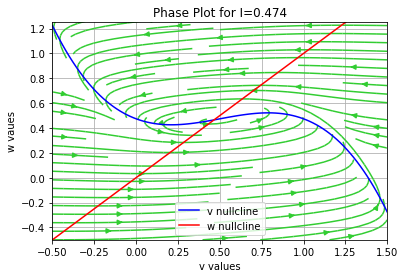

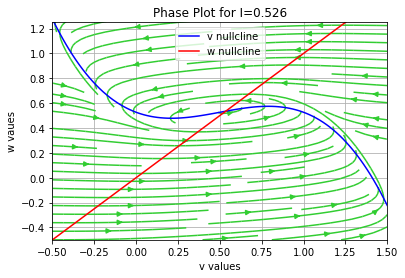

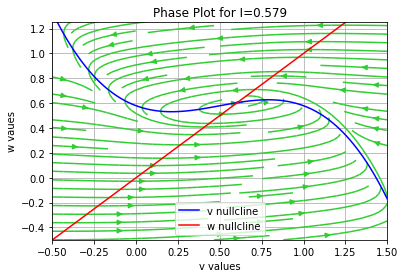

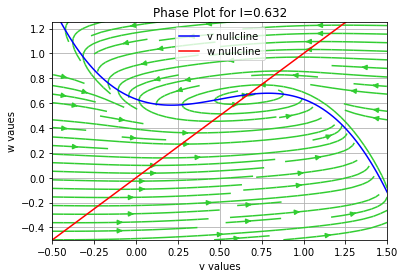

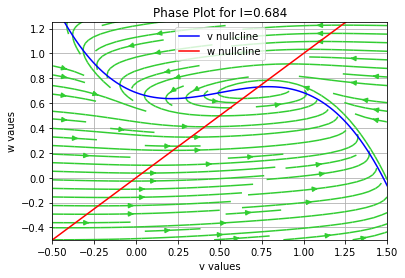

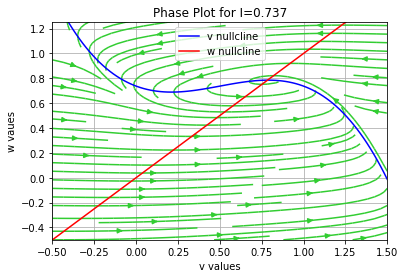

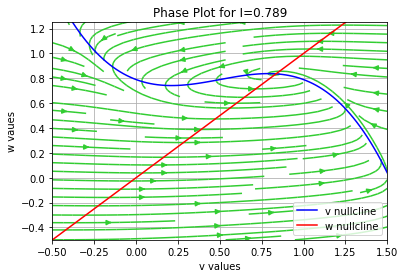

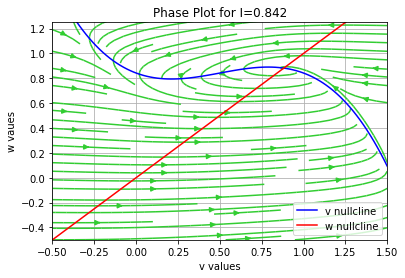

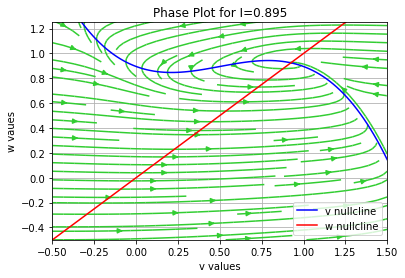

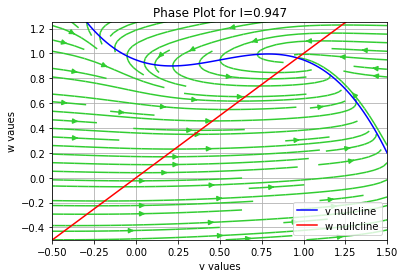

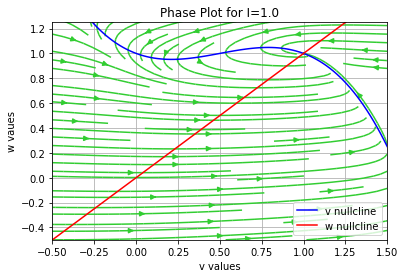

In [8]:
I_list = list(np.linspace(0, 1, 20))
for i in I_list:
    plot_nullclines(i, (-0.5,1.5), (-0.5,1.25), [])  

As it can be seen from the plots above, oscillations start happening at around $I = 0.368$ and end at around $I = 0.684$.

Hence, we assign $I_1 = 0.368$ and $I_2 = 0.684$. 

###**Case-2: $I_{ext} = 0.5$**

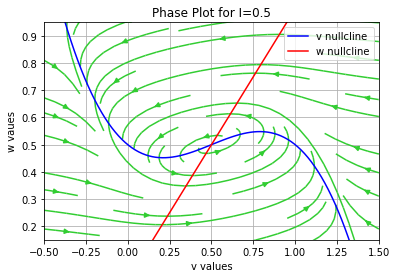

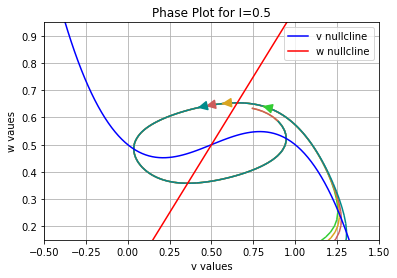

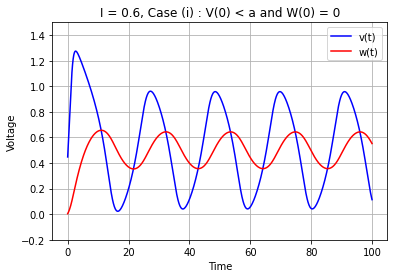

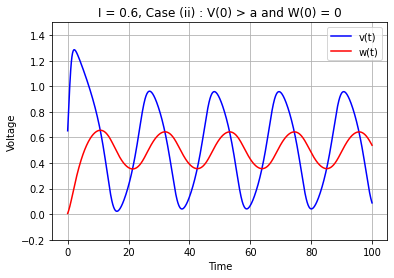

In [9]:
I = 0.5
time = 100
dt = 0.1

# Nullclines
plot_nullclines(I, (-0.5,1.5), (0.15,0.95), [])
plot_nullclines(I, (-0.5,1.5), (0.15,0.95), [[0,0], [0.4,0], [0.6, 0], [1, 0]])

x = list(np.linspace(0,100,1000))

#2(i): V(0) < a and W(0) = 0
vhist, whist = integration(0.4, 0, dt, I, time)
plot_fig([vhist, whist], "I = 0.6, Case (i) : V(0) < a and W(0) = 0", (-0.2,1.5), x, xlim = ())

#2(ii): V(0) > a and W(0) = 0
vhist, whist = integration(0.6, 0, dt, I, time)
plot_fig([vhist, whist], "I = 0.6, Case (ii) : V(0) > a and W(0) = 0", (-0.2,1.5), x, xlim = ())

###**Case-3: $I_{ext} = 1$**

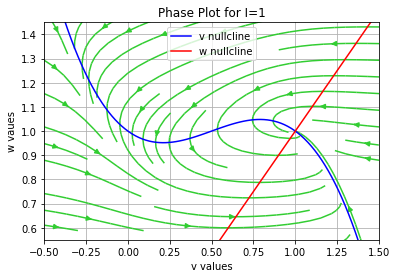

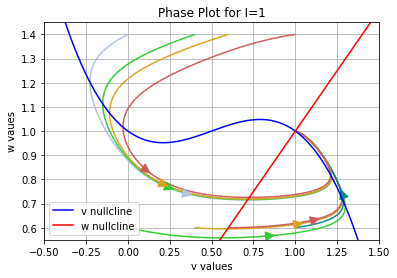

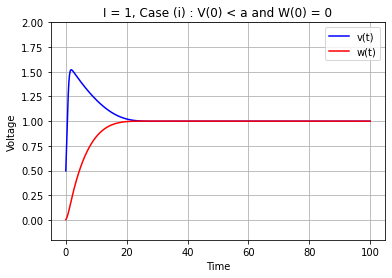

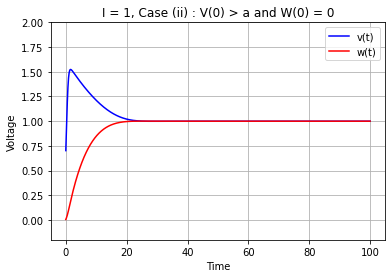

In [10]:
I = 1
time = 100
dt = 0.1

# Nullclines
plot_nullclines(I, (-0.5,1.5), (0.55,1.45), [])
plot_nullclines(I, (-0.5,1.5), (0.55,1.45), [[0,0.6], [0.4,0.6], [0.6, 0.6], [1, 0.6], [0,1.4], [0.4,1.4], [0.6, 1.4], [1, 1.4]])

x = list(np.linspace(0,100,1000))

#3(i): V(0) < a and W(0) = 0
vhist, whist = integration(0.4, 0, dt, I, time)
plot_fig([vhist, whist], "I = 1, Case (i) : V(0) < a and W(0) = 0", (-0.2,2), x, xlim = ())

#3(ii): V(0) > a and W(0) = 0
vhist, whist = integration(0.6, 0, dt, I, time)
plot_fig([vhist, whist], "I = 1, Case (ii) : V(0) > a and W(0) = 0", (-0.2,2), x, xlim = ())

###**Case-4**

$I_{ext}$ and $\frac{b}{r}$ have to be selected such that w nullcline intersects v nullcline at three
distinct points. 

In order to find the values that provided such a system, I fixed the value of
$I_{ext}$ and varied b and r until such a situation arose.

The values obtained are $I_{ext}$ = 0.02, b = 0.01 and r = 0.8.
Hence, $\frac{b}{r}$ = 0.0125

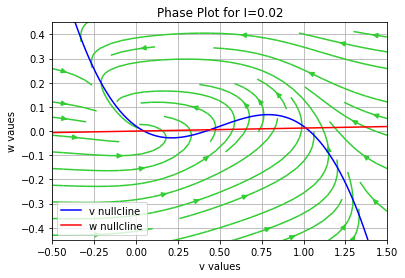

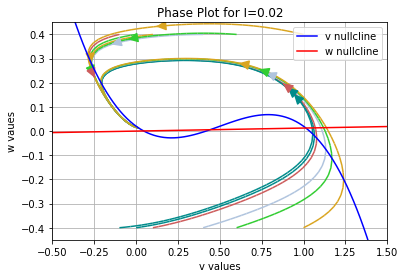

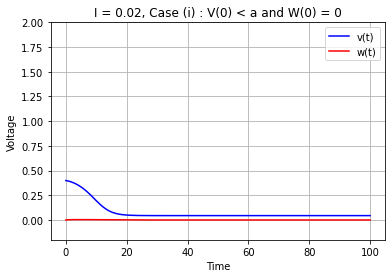

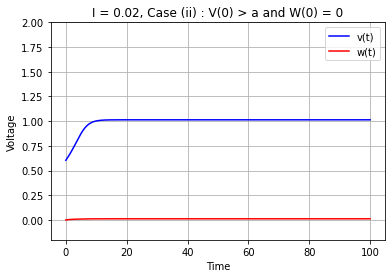

In [11]:
I = 0.02
time = 100
dt = 0.1

b = 0.01
r = 0.8

# Nullclines
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [], b, r)
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [[0,0.4], [0.1,0.4], [-0.1,0.4], [0,-0.4], [0.4,0.4], [0.6, 0.4], [1, 0.4], [0.1,-0.4], [-0.1,-0.4], [0.4,-0.4], [0.6, -0.4], [1, -0.4]], b, r)

x = list(np.linspace(0,100,1000))

#4(i): V(0) < a and W(0) = 0
vhist, whist = integration(0.4, 0, dt, I, time, b, r)
plot_fig([vhist, whist], "I = 0.02, Case (i) : V(0) < a and W(0) = 0", (-0.2,2), x, xlim = ())

#4(ii): V(0) > a and W(0) = 0
vhist, whist = integration(0.6, 0, dt, I, time, b, r)
plot_fig([vhist, whist], "I = 0.02, Case (ii) : V(0) > a and W(0) = 0", (-0.2,2), x, xlim = ())